In [2]:
from cv2 import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [23]:
def extract_lbph_features (image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface_default.xml')
    x,y,w,h = face_cascade.detectMultiScale(image, 1.3, 5)[0]
    cropped = image[y:y+h, x:x+w]


    rows,cols = cropped.shape
    patternImage = np.zeros((rows,cols))
    
    for row in range(rows):
        for col in range(cols):
            subMatrix = cropped[row-1:row+2,col-1:col+2].copy()
            subRows, subColumns = subMatrix.shape
       
            if subRows!=3 or subColumns!=3:
                continue
        
            threshold = subMatrix[1,1]
            binary = ''
            for subRow in range(3):
                for subColumn in range(3):
                    if(subRow == 1 and subColumn == 1):
                        continue
                    elif(subMatrix[subRow,subColumn] < threshold):
                        binary += '0'
                    else:
                        binary += '1'
            patternImage[row,col] = int(binary,2)

    patternImage = patternImage.astype(int)
    patternImage = patternImage[1:rows-1,1:cols-1].copy()
    
    
    plt.imshow(patternImage,cmap='gray')
    plt.show()
    
    gridX = 4
    gridY = 4

    width, height = patternImage.shape
    offsetX = math.floor(width/gridX)
    offsetY = math.floor(height/gridY)
    patternImageCopy = patternImage.copy()

    cellLocations = []

    for i in range(gridX):
        for j in range(gridY):
            cellLocations.append((i*offsetX,j*offsetY))
            
    histogramArray = []

    for x,y in cellLocations:
        region = patternImage[y:y+offsetY,x:x+offsetX]
        histogram,_ = np.histogram(region,bins=256)
        histogramArray.append(histogram)
        
    faceFeatures = np.array([])

    for histogram in histogramArray:
        faceFeatures = np.concatenate((faceFeatures,histogram))
        
    #return faceFeatures            
    # Normalize the features
    amax = np.amax(faceFeatures)
    amin = np.amin(faceFeatures)
    for i,_ in enumerate(faceFeatures):
        faceFeatures[i] = (faceFeatures[i]-amin) / (amax-amin)
        
    return faceFeatures

In [24]:
def getSimilarity(vector1, vector2):
    cos_sim = np.dot(vector1, vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))
    return cos_sim

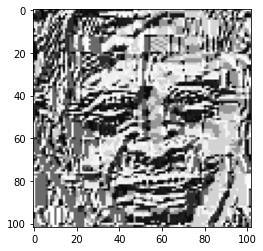

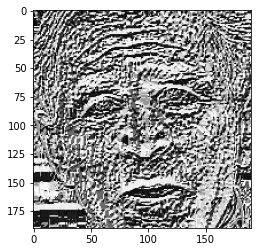

0.75688427975462


In [25]:
image1 = cv2.imread("./bush.jpg")
image2 = cv2.imread("./bush2.jpg")

image1_features = extract_lbph_features(image1)
image2_features = extract_lbph_features(image2)

distance = getSimilarity(image1_features,image2_features)
print(distance)

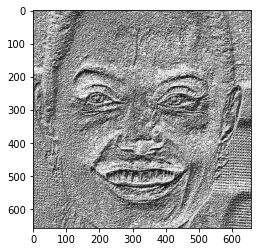

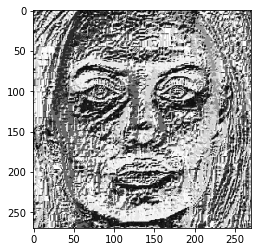

0.796790587141228


In [26]:
image1 = cv2.imread("./angelina1.jpg")
image2 = cv2.imread("./angelina2.jpg")

image1_features = extract_lbph_features(image1)
image2_features = extract_lbph_features(image2)

distance = getSimilarity(image1_features,image2_features)
print(distance)

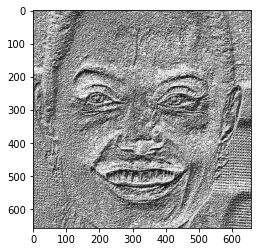

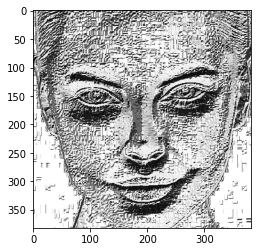

0.6764271993365589


In [29]:
image1 = cv2.imread("./angelina1.jpg")
image2 = cv2.imread("./ex1.jpg")

image1_features = extract_lbph_features(image1)
image2_features = extract_lbph_features(image2)

distance = getSimilarity(image1_features,image2_features)
print(distance)